# <div style="text-align: center"><font color='gray' textalign='center'>Lab 1: Data Profilling</font></div>

In [1]:
import pandas as pd
import ds_functions as ds
import matplotlib.pyplot as plt

data = pd.read_csv('heart_failure_clinical_records_dataset.csv', sep = ',')

data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


## <font color='gray'> Data Dimensionality </font>

In [2]:
data.shape

(299, 13)

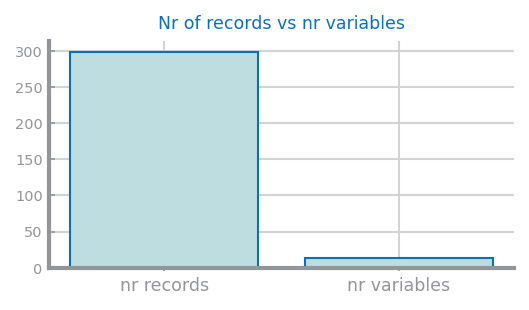

In [3]:
plt.figure(figsize=(4,2))
values = {'nr records': data.shape[0], 'nr variables': data.shape[1]}
ds.bar_chart(values.keys(), values.values(), title='Nr of records vs nr variables')

## <font color='gray'> Variables Type </font>

In [4]:
data.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [5]:
data.sex[data.sex == 1] = "Man"
data.sex[data.sex == 0] = "Woman"
data["sex"] = data["sex"].astype("category")

data["anaemia"] = data["anaemia"].astype("bool")
data["diabetes"] = data["diabetes"].astype("bool")
data["high_blood_pressure"] = data["high_blood_pressure"].astype("bool")
data["smoking"] = data["smoking"].astype("bool")
data["DEATH_EVENT"] = data["DEATH_EVENT"].astype("bool")

data.dtypes

age                          float64
anaemia                         bool
creatinine_phosphokinase       int64
diabetes                        bool
ejection_fraction              int64
high_blood_pressure             bool
platelets                    float64
serum_creatinine             float64
serum_sodium                   int64
sex                         category
smoking                         bool
time                           int64
DEATH_EVENT                     bool
dtype: object

## <font color='gray'> Missing Values </font>

dict_values([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

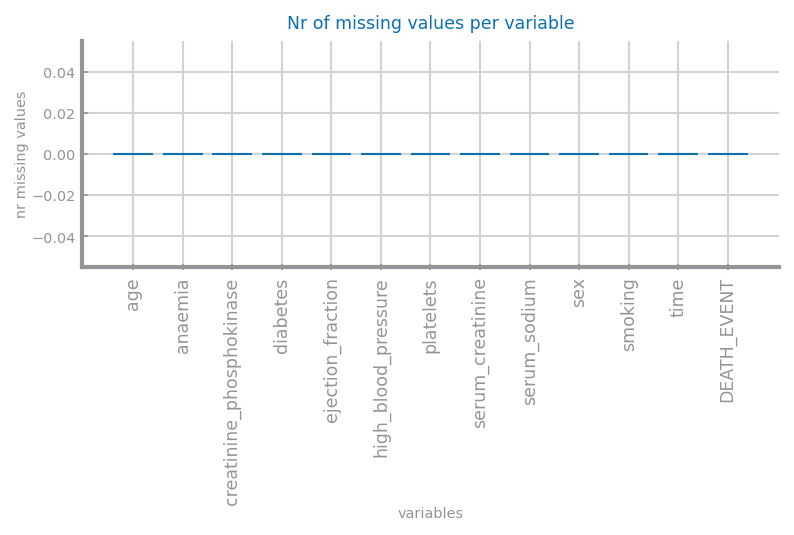

In [6]:
plt.figure(figsize=(6,2))
mv = {}
for var in data:
    mv[var] = data[var].isna().sum()
ds.bar_chart(mv.keys(), mv.values(), title='Nr of missing values per variable',
               xlabel='variables',
               ylabel='nr missing values')
plt.xticks(rotation=90)
mv.values()

## <font color='gray'> Data Distribution - Numeric Variables</font>

In [7]:
data.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


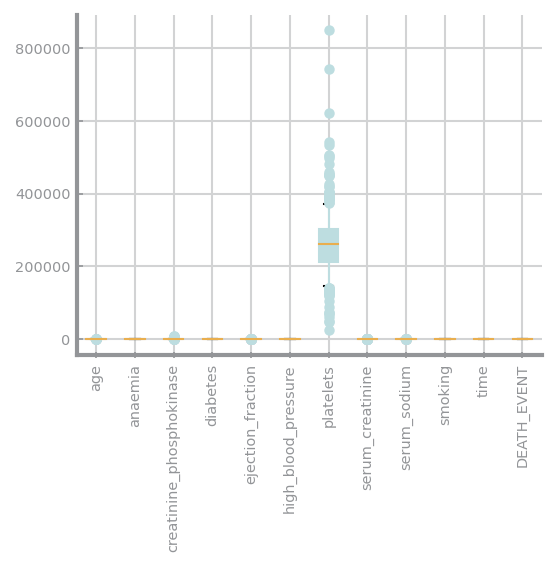

In [8]:
data.boxplot(rot = 90)
plt.show()

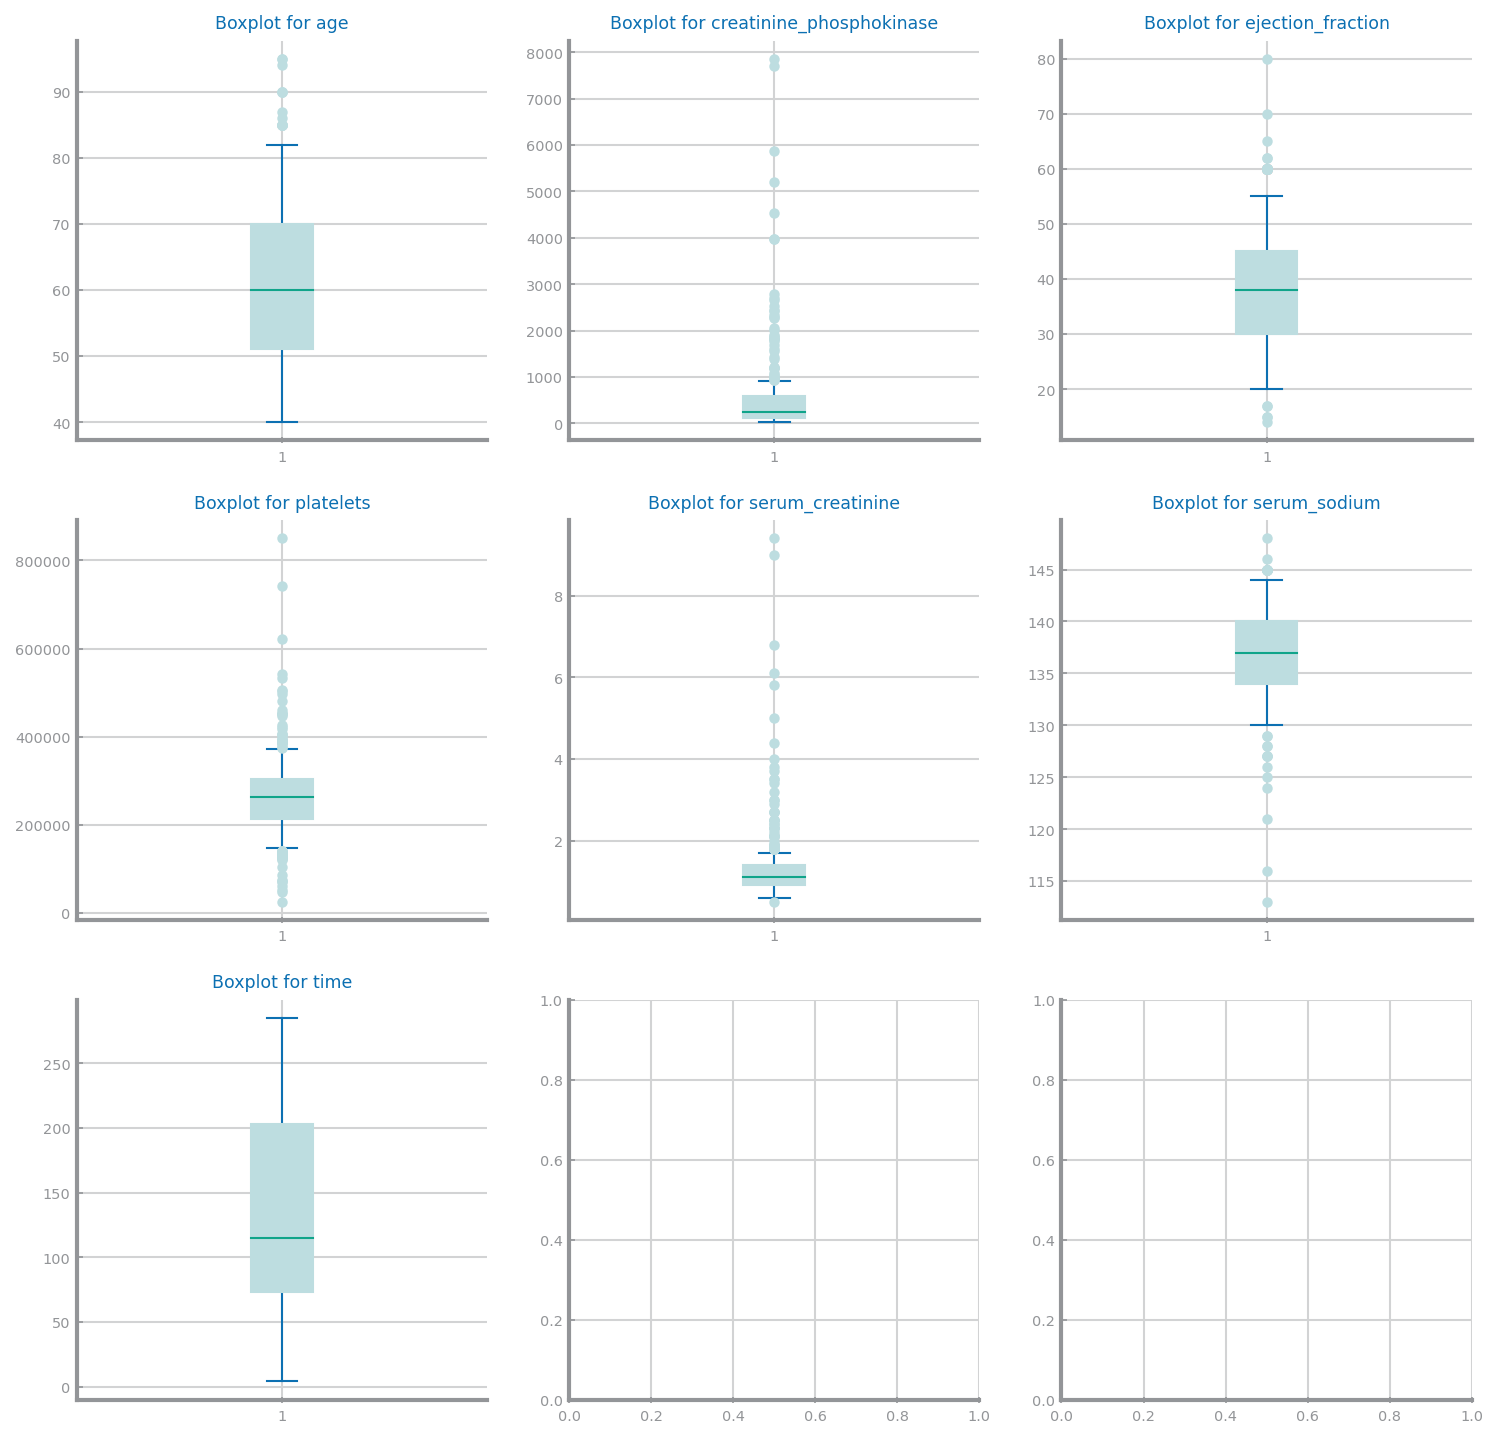

In [9]:
numeric_vars = data.select_dtypes(include='number').columns
rows, cols = ds.choose_grid(len(numeric_vars))
fig, axs = plt.subplots(rows, cols, figsize=(cols*ds.HEIGHT, rows*ds.HEIGHT))
i, j = 0, 0
for n in range(len(numeric_vars)):
    axs[i, j].set_title('Boxplot for %s'%numeric_vars[n])
    axs[i, j].boxplot(data[numeric_vars[n]].dropna().values)
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
plt.show()

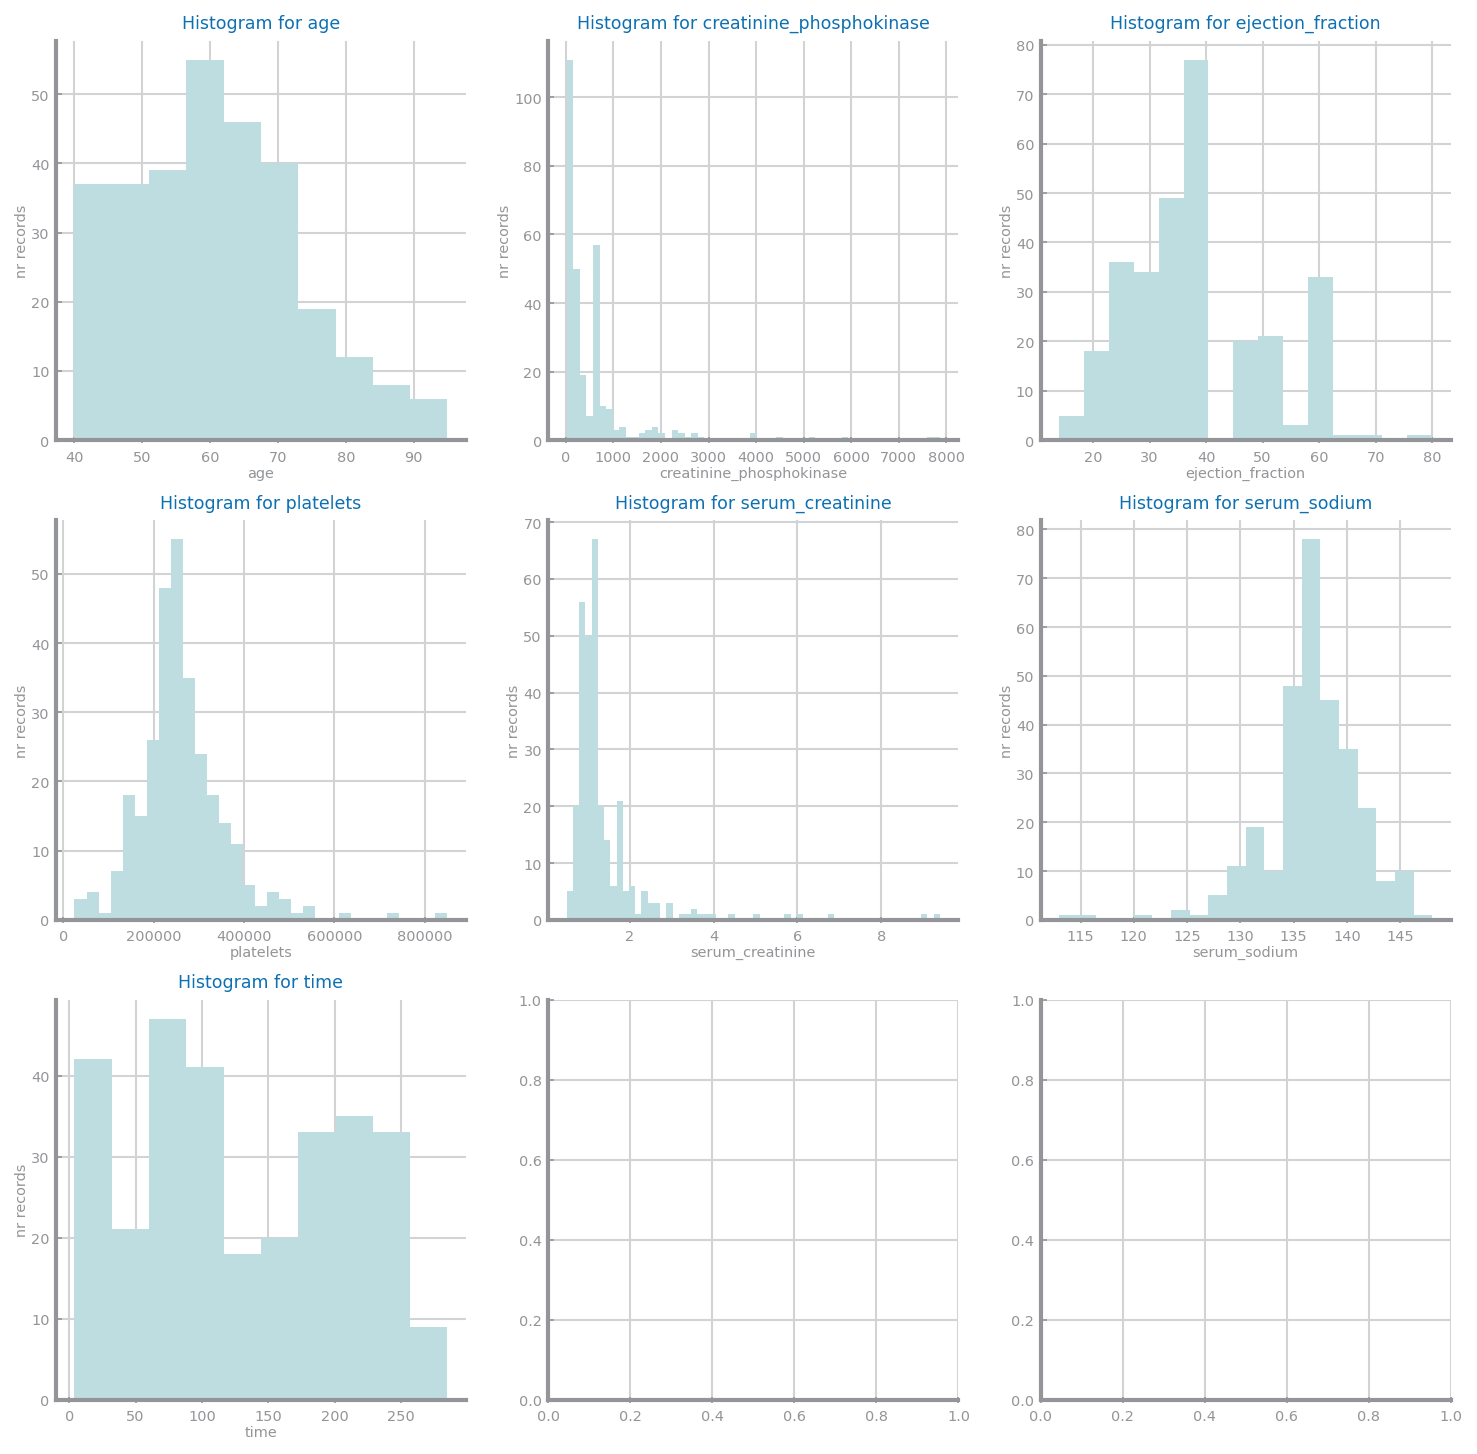

In [10]:
fig, axs = plt.subplots(rows, cols, figsize=(cols*ds.HEIGHT, rows*ds.HEIGHT))
i, j = 0, 0
for n in range(len(numeric_vars)):
    axs[i, j].set_title('Histogram for %s'%numeric_vars[n])
    axs[i, j].set_xlabel(numeric_vars[n])
    axs[i, j].set_ylabel("nr records")
    axs[i, j].hist(data[numeric_vars[n]].dropna().values, 'auto')
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
plt.show()

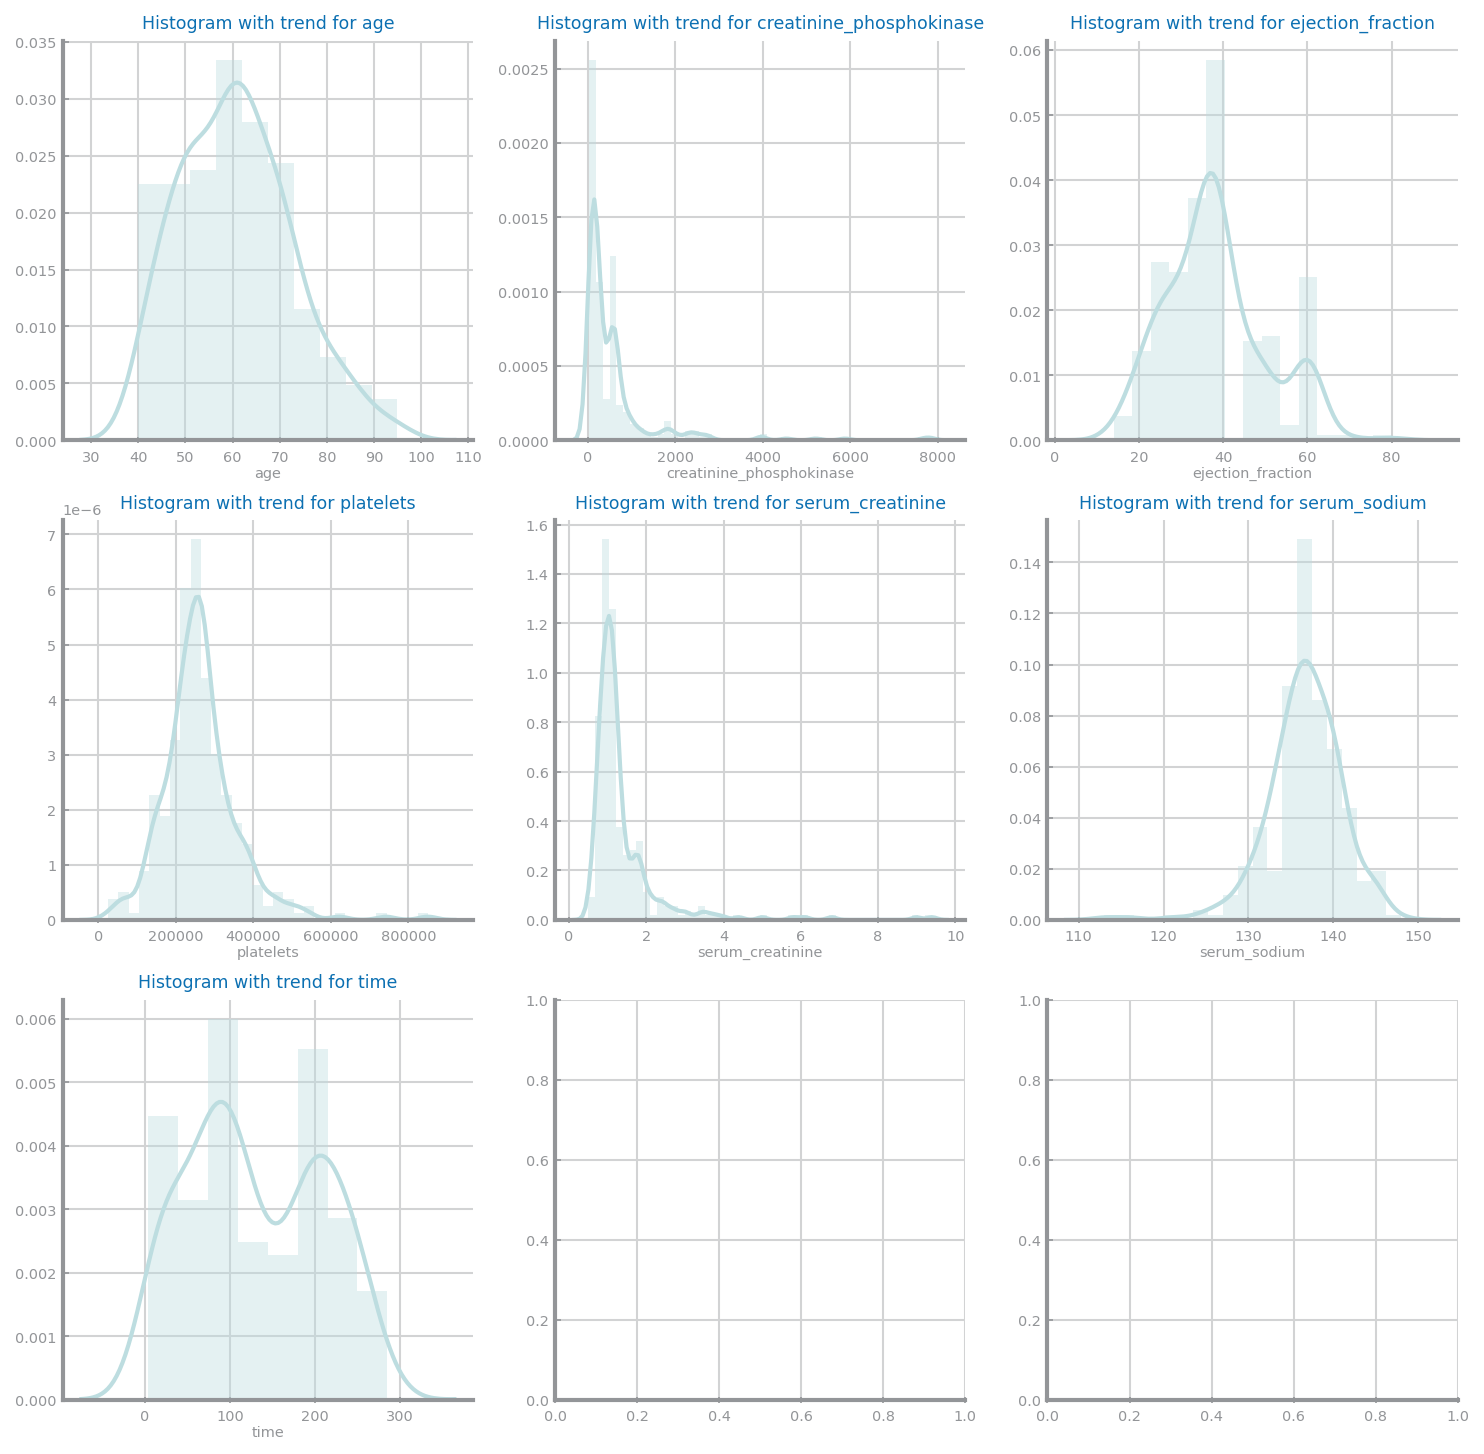

In [11]:
import seaborn as sns
fig, axs = plt.subplots(rows, cols, figsize=(cols*ds.HEIGHT, rows*ds.HEIGHT))
i, j = 0, 0
for n in range(len(numeric_vars)):
    axs[i, j].set_title('Histogram with trend for %s'%numeric_vars[n])
    sns.distplot(data[numeric_vars[n]].dropna().values, norm_hist=True, ax=axs[i, j], axlabel=numeric_vars[n])
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
plt.show()

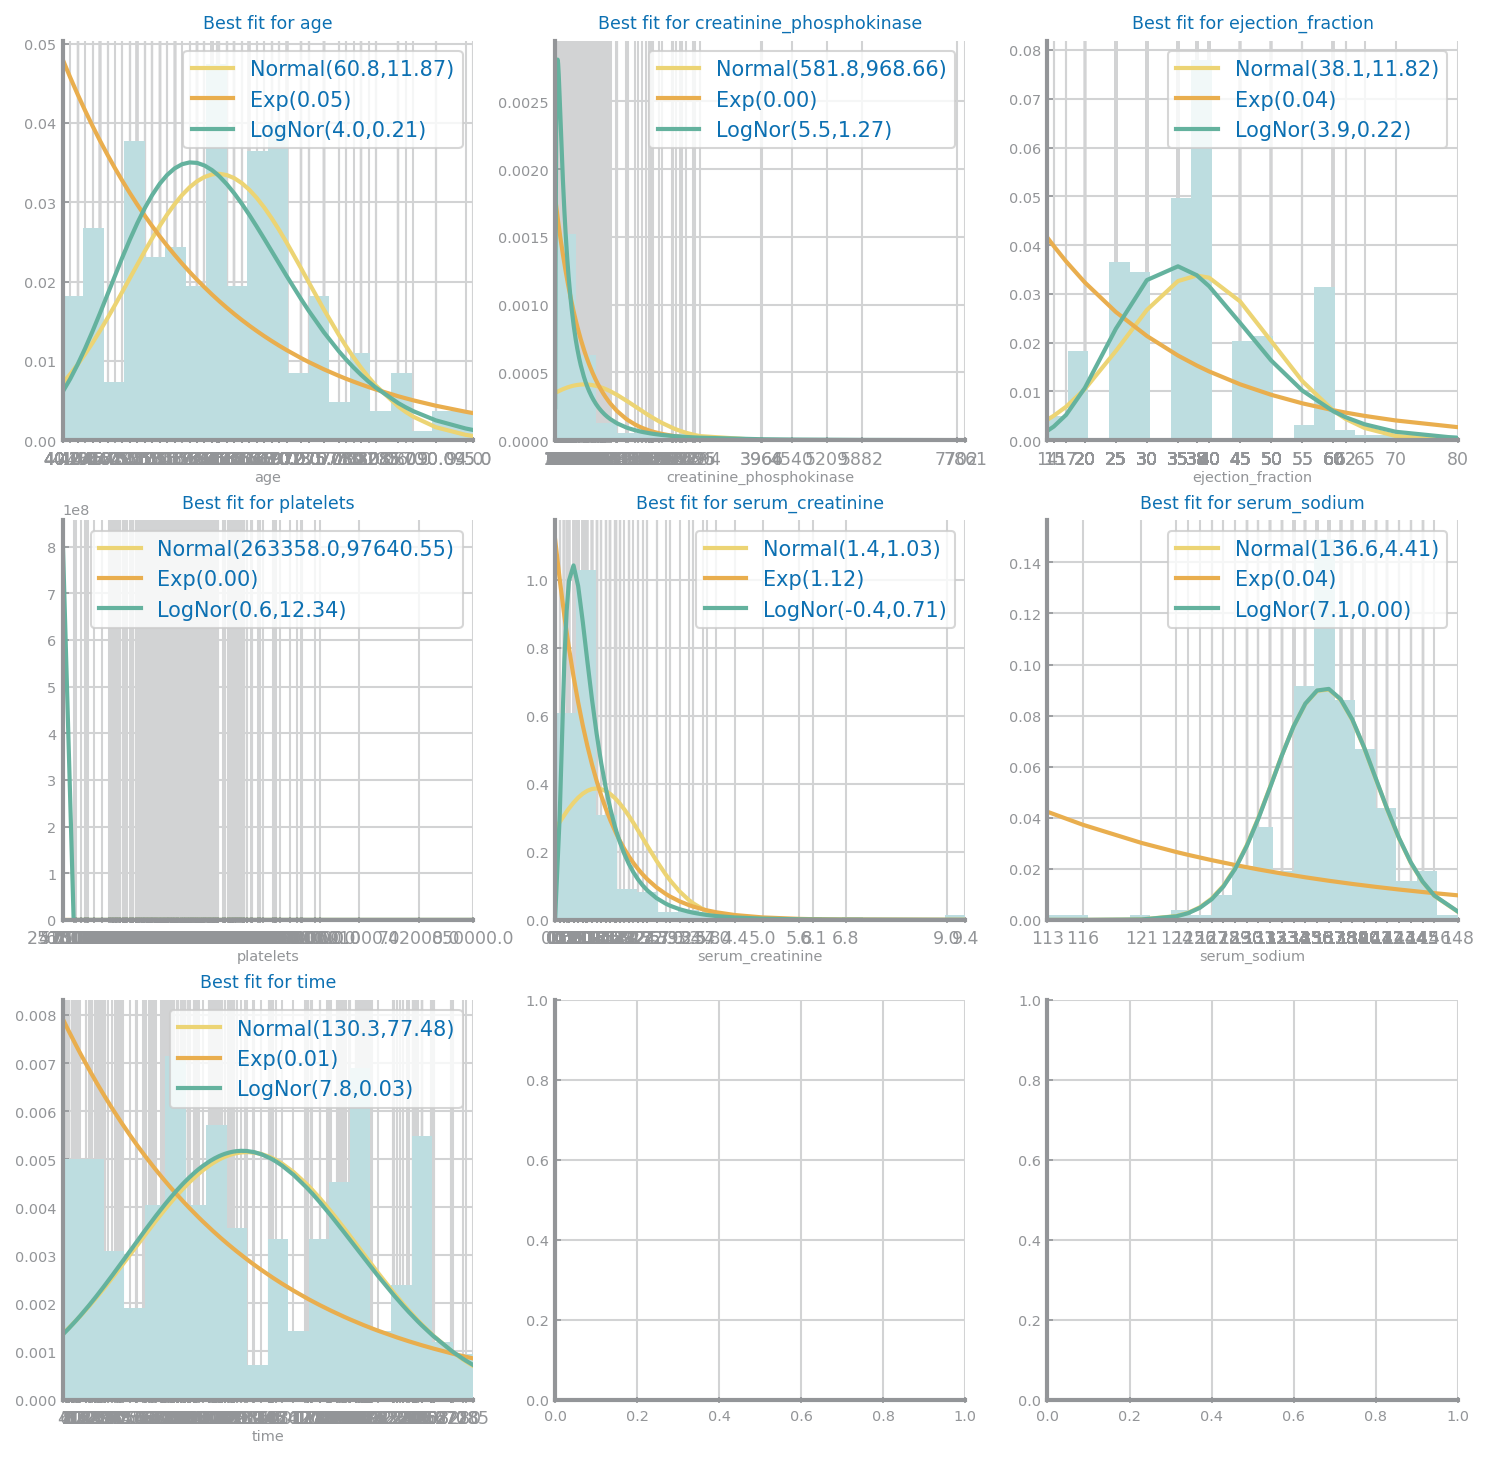

In [12]:
import scipy.stats as _stats
import numpy as np
def compute_known_distributions(x_values: list) -> dict:
    distributions = dict()
    # Gaussian
    mean, sigma = _stats.norm.fit(x_values)
    distributions['Normal(%.1f,%.2f)'%(mean,sigma)] = _stats.norm.pdf(x_values, mean, sigma)
    # Exponential
    loc, scale = _stats.expon.fit(x_values)
    distributions['Exp(%.2f)'%(1/scale)] = _stats.expon.pdf(x_values, loc, scale)
    # LogNorm
    sigma, loc, scale = _stats.lognorm.fit(x_values)
    distributions['LogNor(%.1f,%.2f)'%(np.log(scale),sigma)] = _stats.lognorm.pdf(x_values, sigma, loc, scale)
    return distributions

def histogram_with_distributions(ax: plt.Axes, series: pd.Series, var: str):
    values = series.sort_values().values
    ax.hist(values, 20, density=True)
    distributions = compute_known_distributions(values)
    ds.multiple_line_chart(values, distributions, ax=ax, title='Best fit for %s'%var, xlabel=var, ylabel='')

fig, axs = plt.subplots(rows, cols, figsize=(cols*ds.HEIGHT, rows*ds.HEIGHT))
i, j = 0, 0
for n in range(len(numeric_vars)):
    histogram_with_distributions(axs[i, j], data[numeric_vars[n]].dropna(), numeric_vars[n])
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
plt.show()

## <font color='gray'> Data Distribution - Symbolic Variables</font>

In [13]:
data.describe(include=["category", "bool"])

,anaemia,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT
count,299,299,299,299,299,299
unique,2,2,2,2,2,2
top,False,False,False,Man,False,False
freq,170,174,194,194,203,203


In [14]:
symbolic_vars = data.select_dtypes(include = ["bool", "category"]).columns

for var in symbolic_vars:
    print(var, data[var].unique())

anaemia [False  True]
diabetes [False  True]
high_blood_pressure [ True False]
sex [Man, Woman]
Categories (2, object): [Man, Woman]
smoking [False  True]
DEATH_EVENT [ True False]


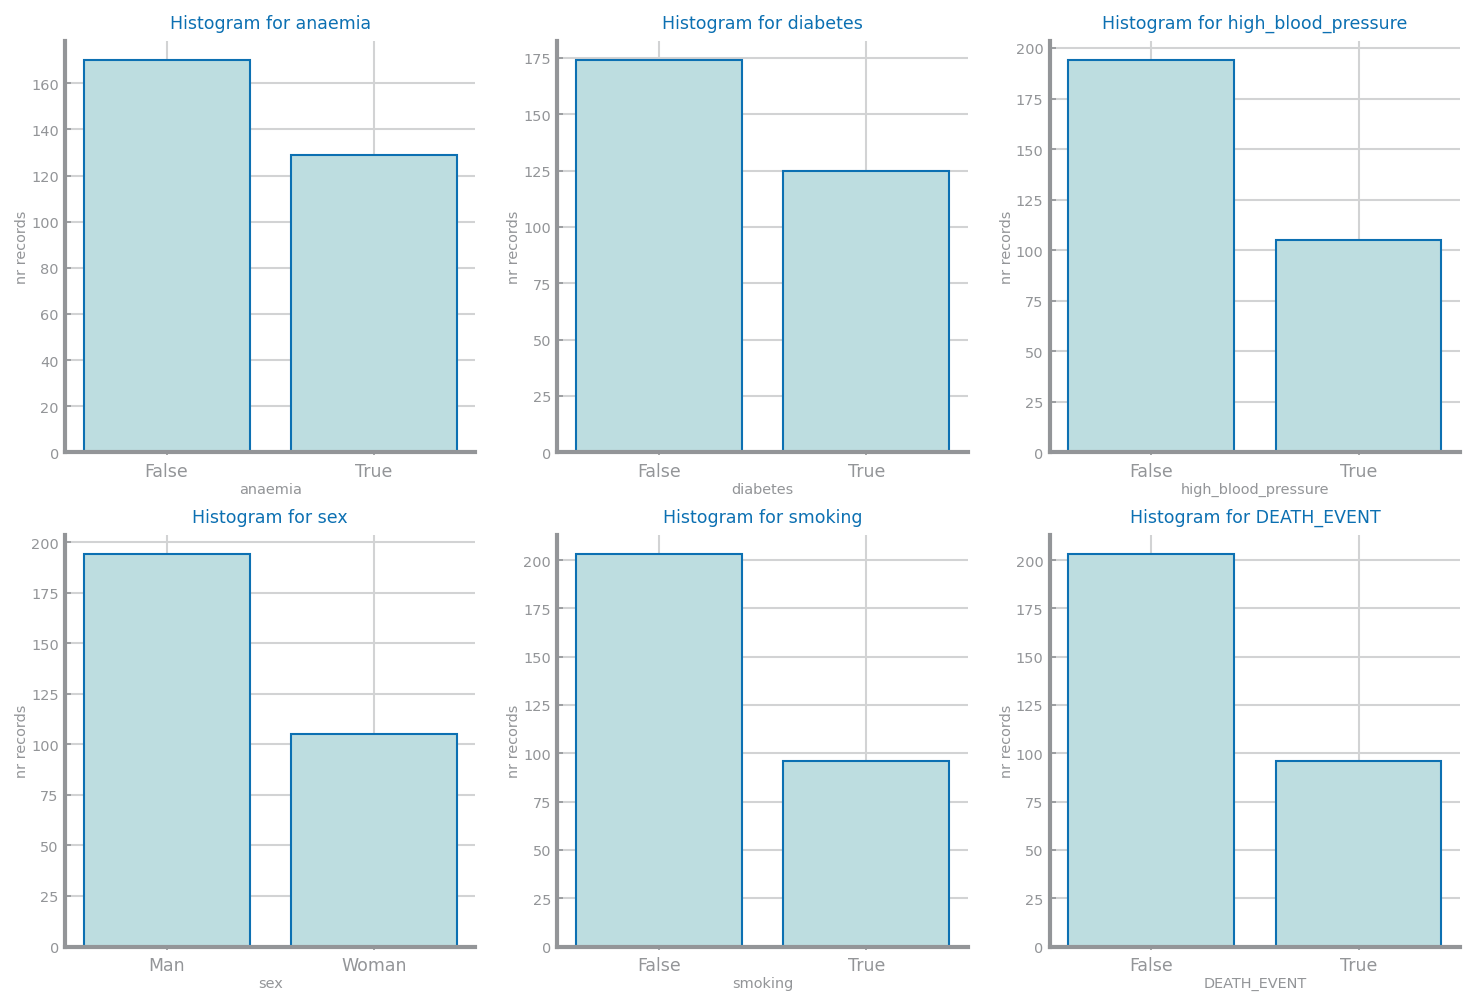

In [15]:
rows, cols = ds.choose_grid(len(symbolic_vars))
fig, axs = plt.subplots(rows, cols, figsize=(cols*ds.HEIGHT, rows*ds.HEIGHT), squeeze=False)
i, j = 0, 0
for n in range(len(symbolic_vars)):
    counts = data[symbolic_vars[n]].value_counts() 
    ds.bar_chart(list(map(str, counts.index.to_list())), counts.values, ax=axs[i, j], title='Histogram for %s'%symbolic_vars[n],
                 xlabel=symbolic_vars[n], ylabel='nr records')
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
plt.show()

## <font color='gray'> Data Granularity</font>

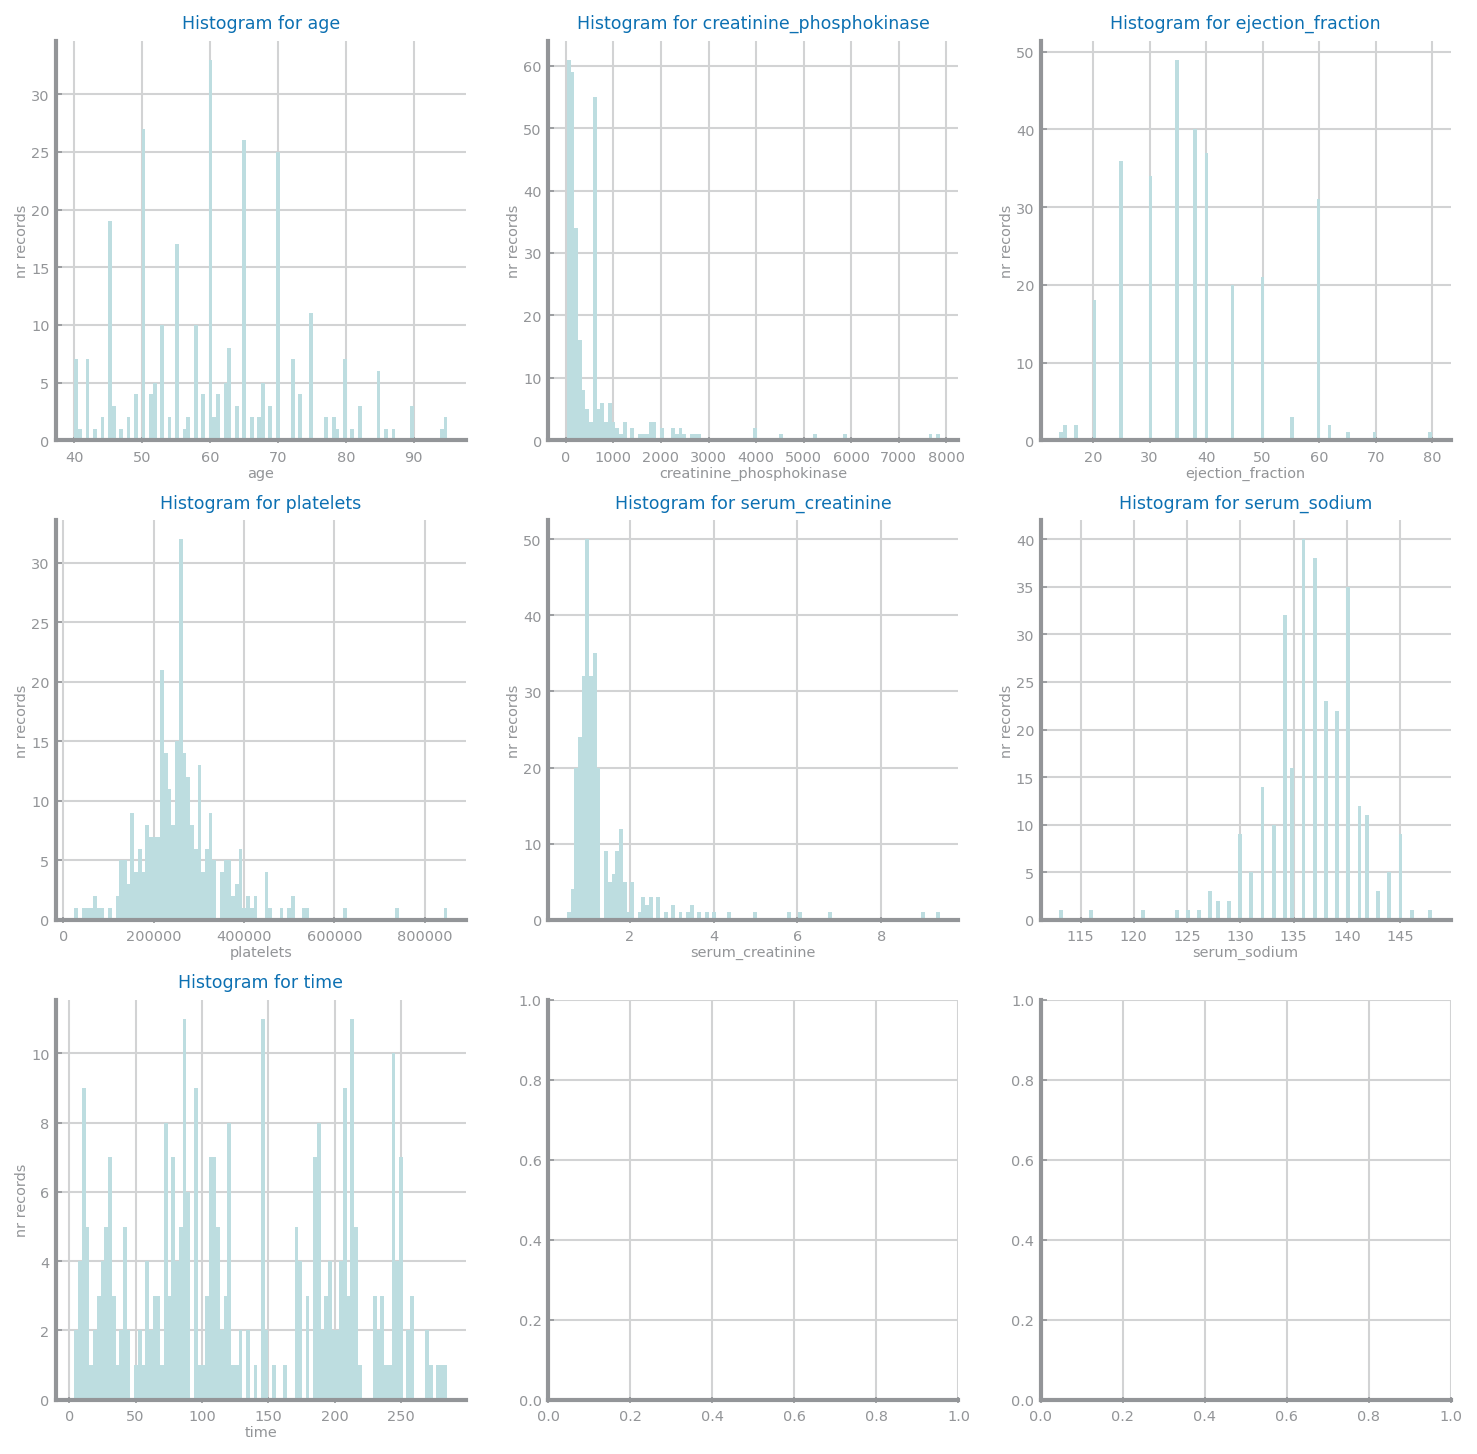

In [16]:
variables = data.select_dtypes(include='number').columns
rows, cols = ds.choose_grid(len(variables))
fig, axs = plt.subplots(rows, cols, figsize=(cols*ds.HEIGHT, rows*ds.HEIGHT))
i, j = 0, 0
for n in range(len(variables)):
    axs[i, j].set_title('Histogram for %s'%variables[n])
    axs[i, j].set_xlabel(variables[n])
    axs[i, j].set_ylabel('nr records')
    axs[i, j].hist(data[variables[n]].values, bins=100)
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
plt.show()

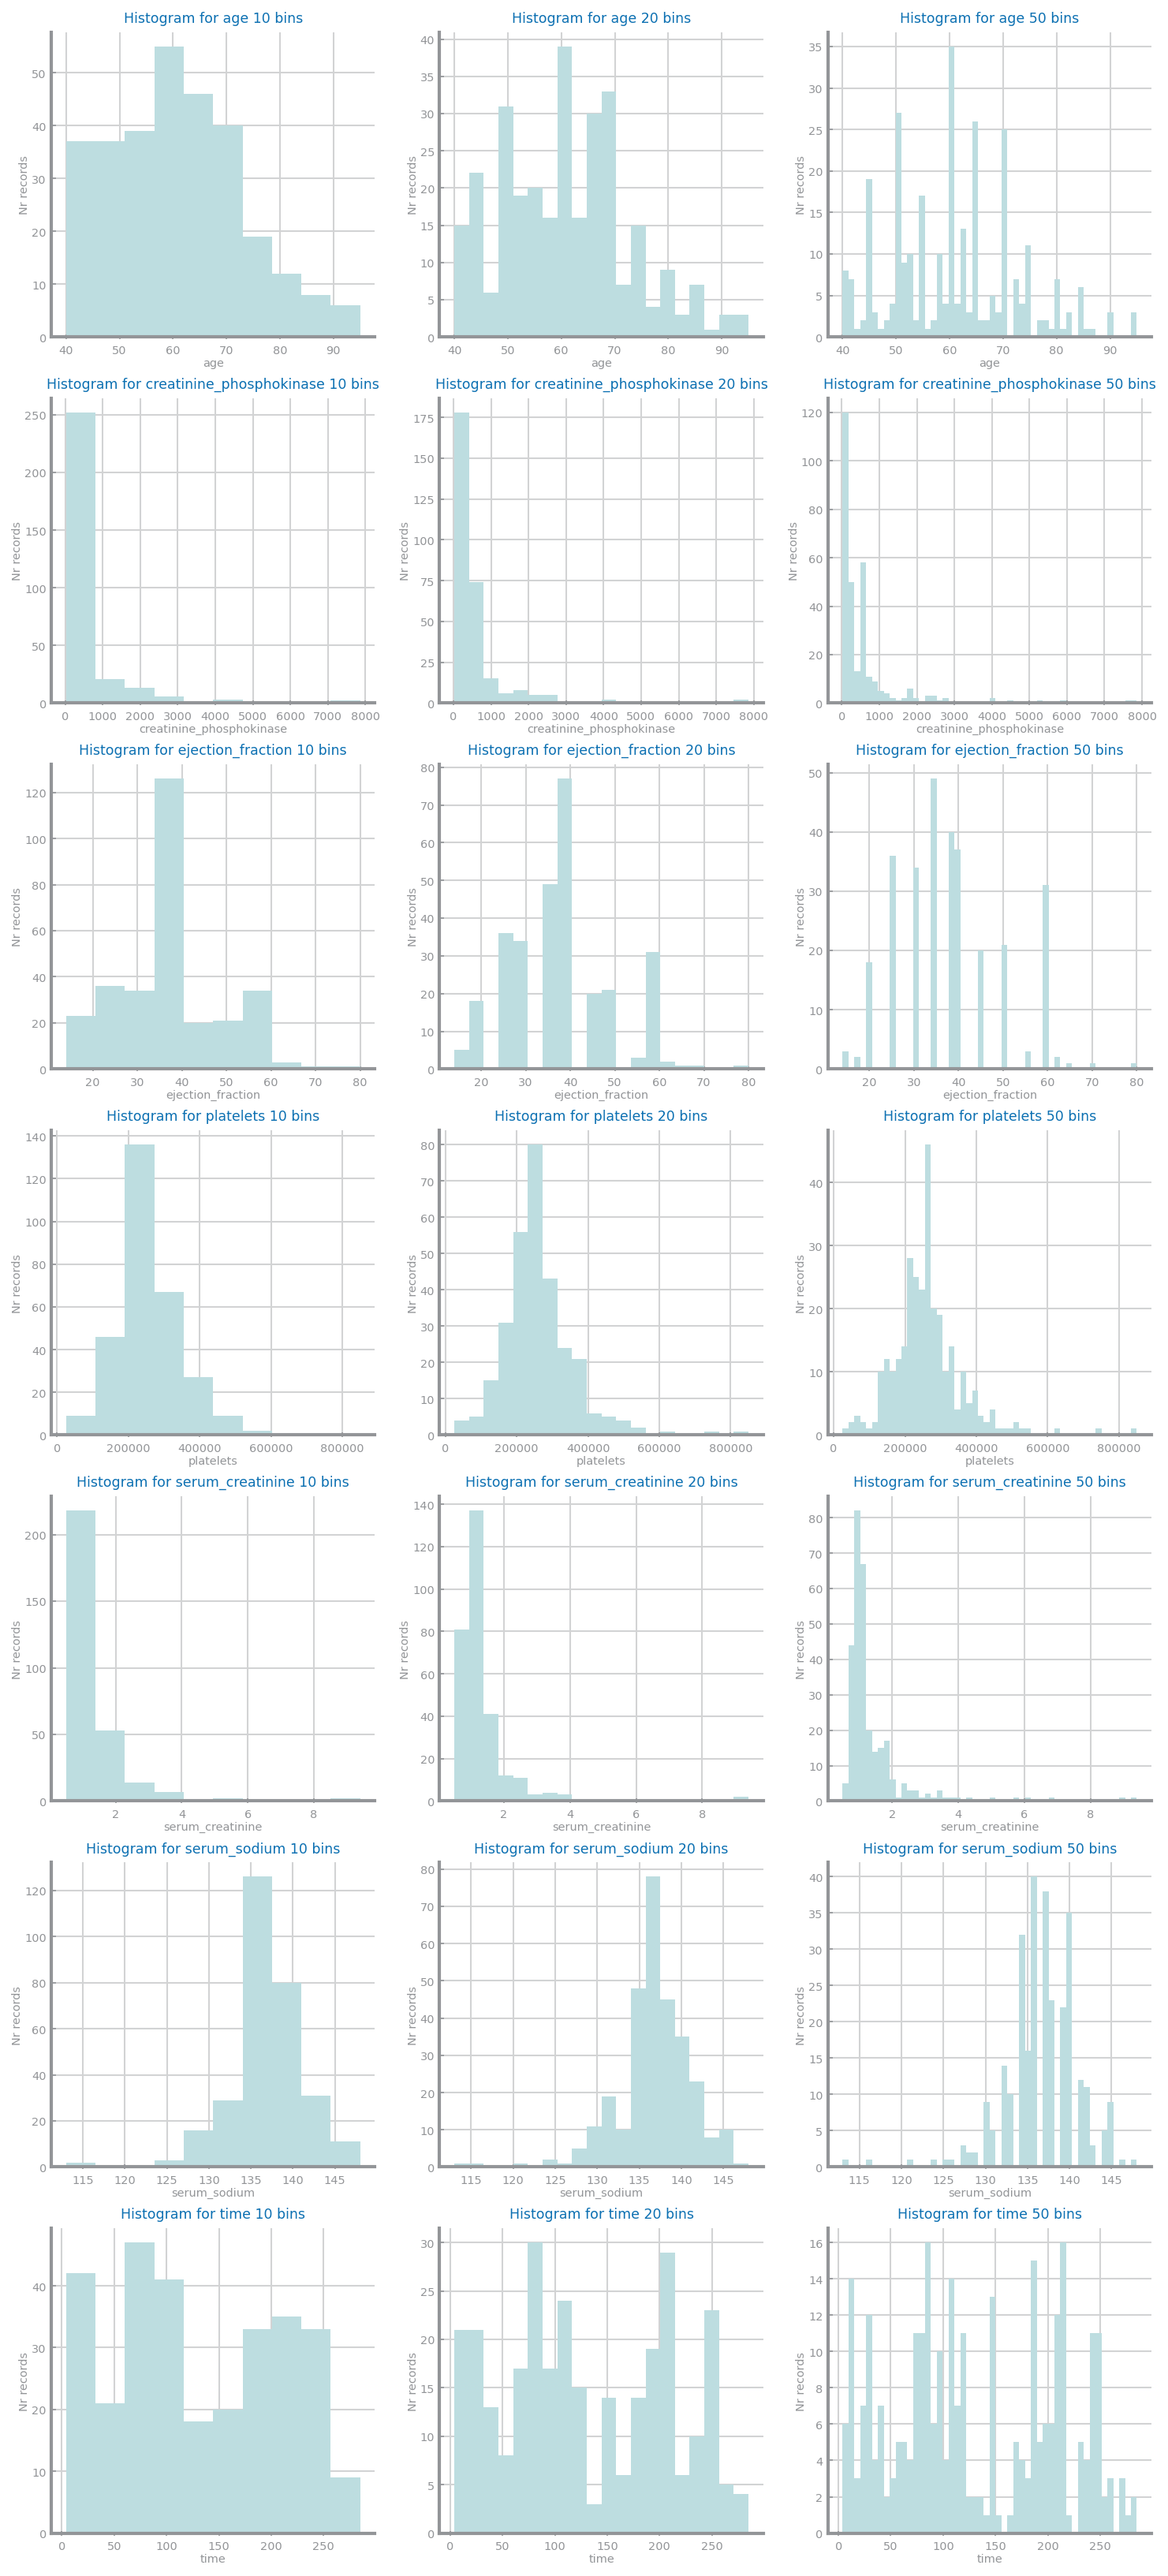

In [17]:
columns = data.select_dtypes(include='number').columns
rows = len(columns)
bins = (10, 20, 50)
cols = len(bins)
fig, axs = plt.subplots(rows, cols, figsize=(cols*ds.HEIGHT, rows*ds.HEIGHT))
for i in range(rows):
    for j in range(cols):
        axs[i, j].set_title('Histogram for %s %d bins'%(columns[i], bins[j]))
        axs[i, j].set_xlabel(columns[i])
        axs[i, j].set_ylabel('Nr records')
        axs[i, j].hist(data[columns[i]].values, bins=bins[j])
plt.show()

## <font color='gray'> Sparsity</font>

<Figure size 600x450 with 0 Axes>

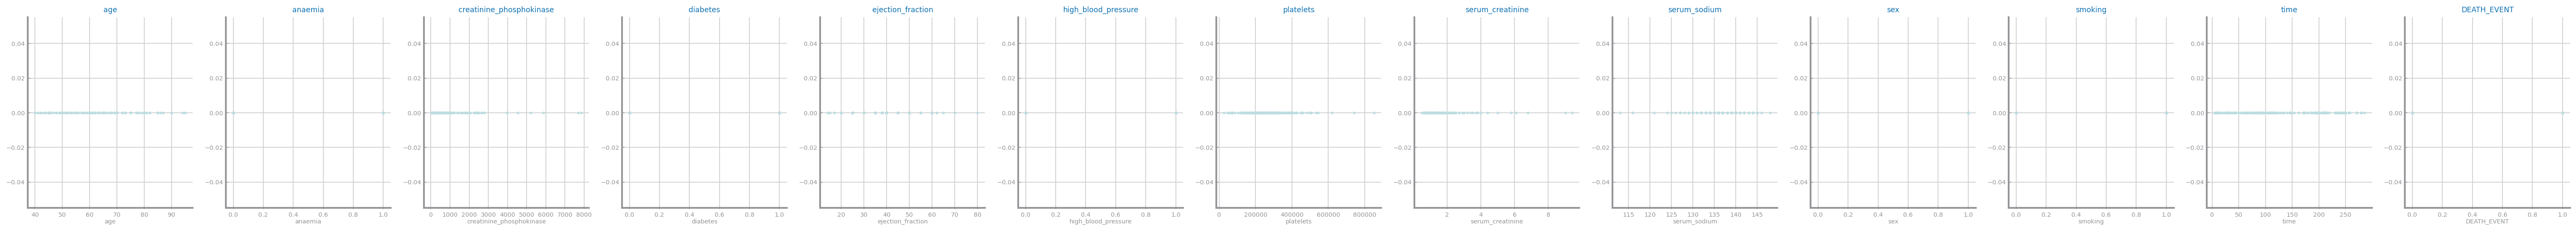

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import config as cfg

data = pd.read_csv('heart_failure_clinical_records_dataset.csv', sep = ',')

columns = data.select_dtypes(include='number').columns
cols = len(columns)
plt.figure()
fig, axs = plt.subplots(1, cols, figsize=(cols*4, 4),squeeze=False)
for i in range(len(columns)):
    var1 = columns[i]
    var2 = 0
    axs[0, i].set_title(var1)
    axs[0, i].set_xlabel(var1)
    axs[0, i].scatter(data[var1], np.zeros(len(data[var1])))
plt.show()

<Figure size 600x450 with 0 Axes>

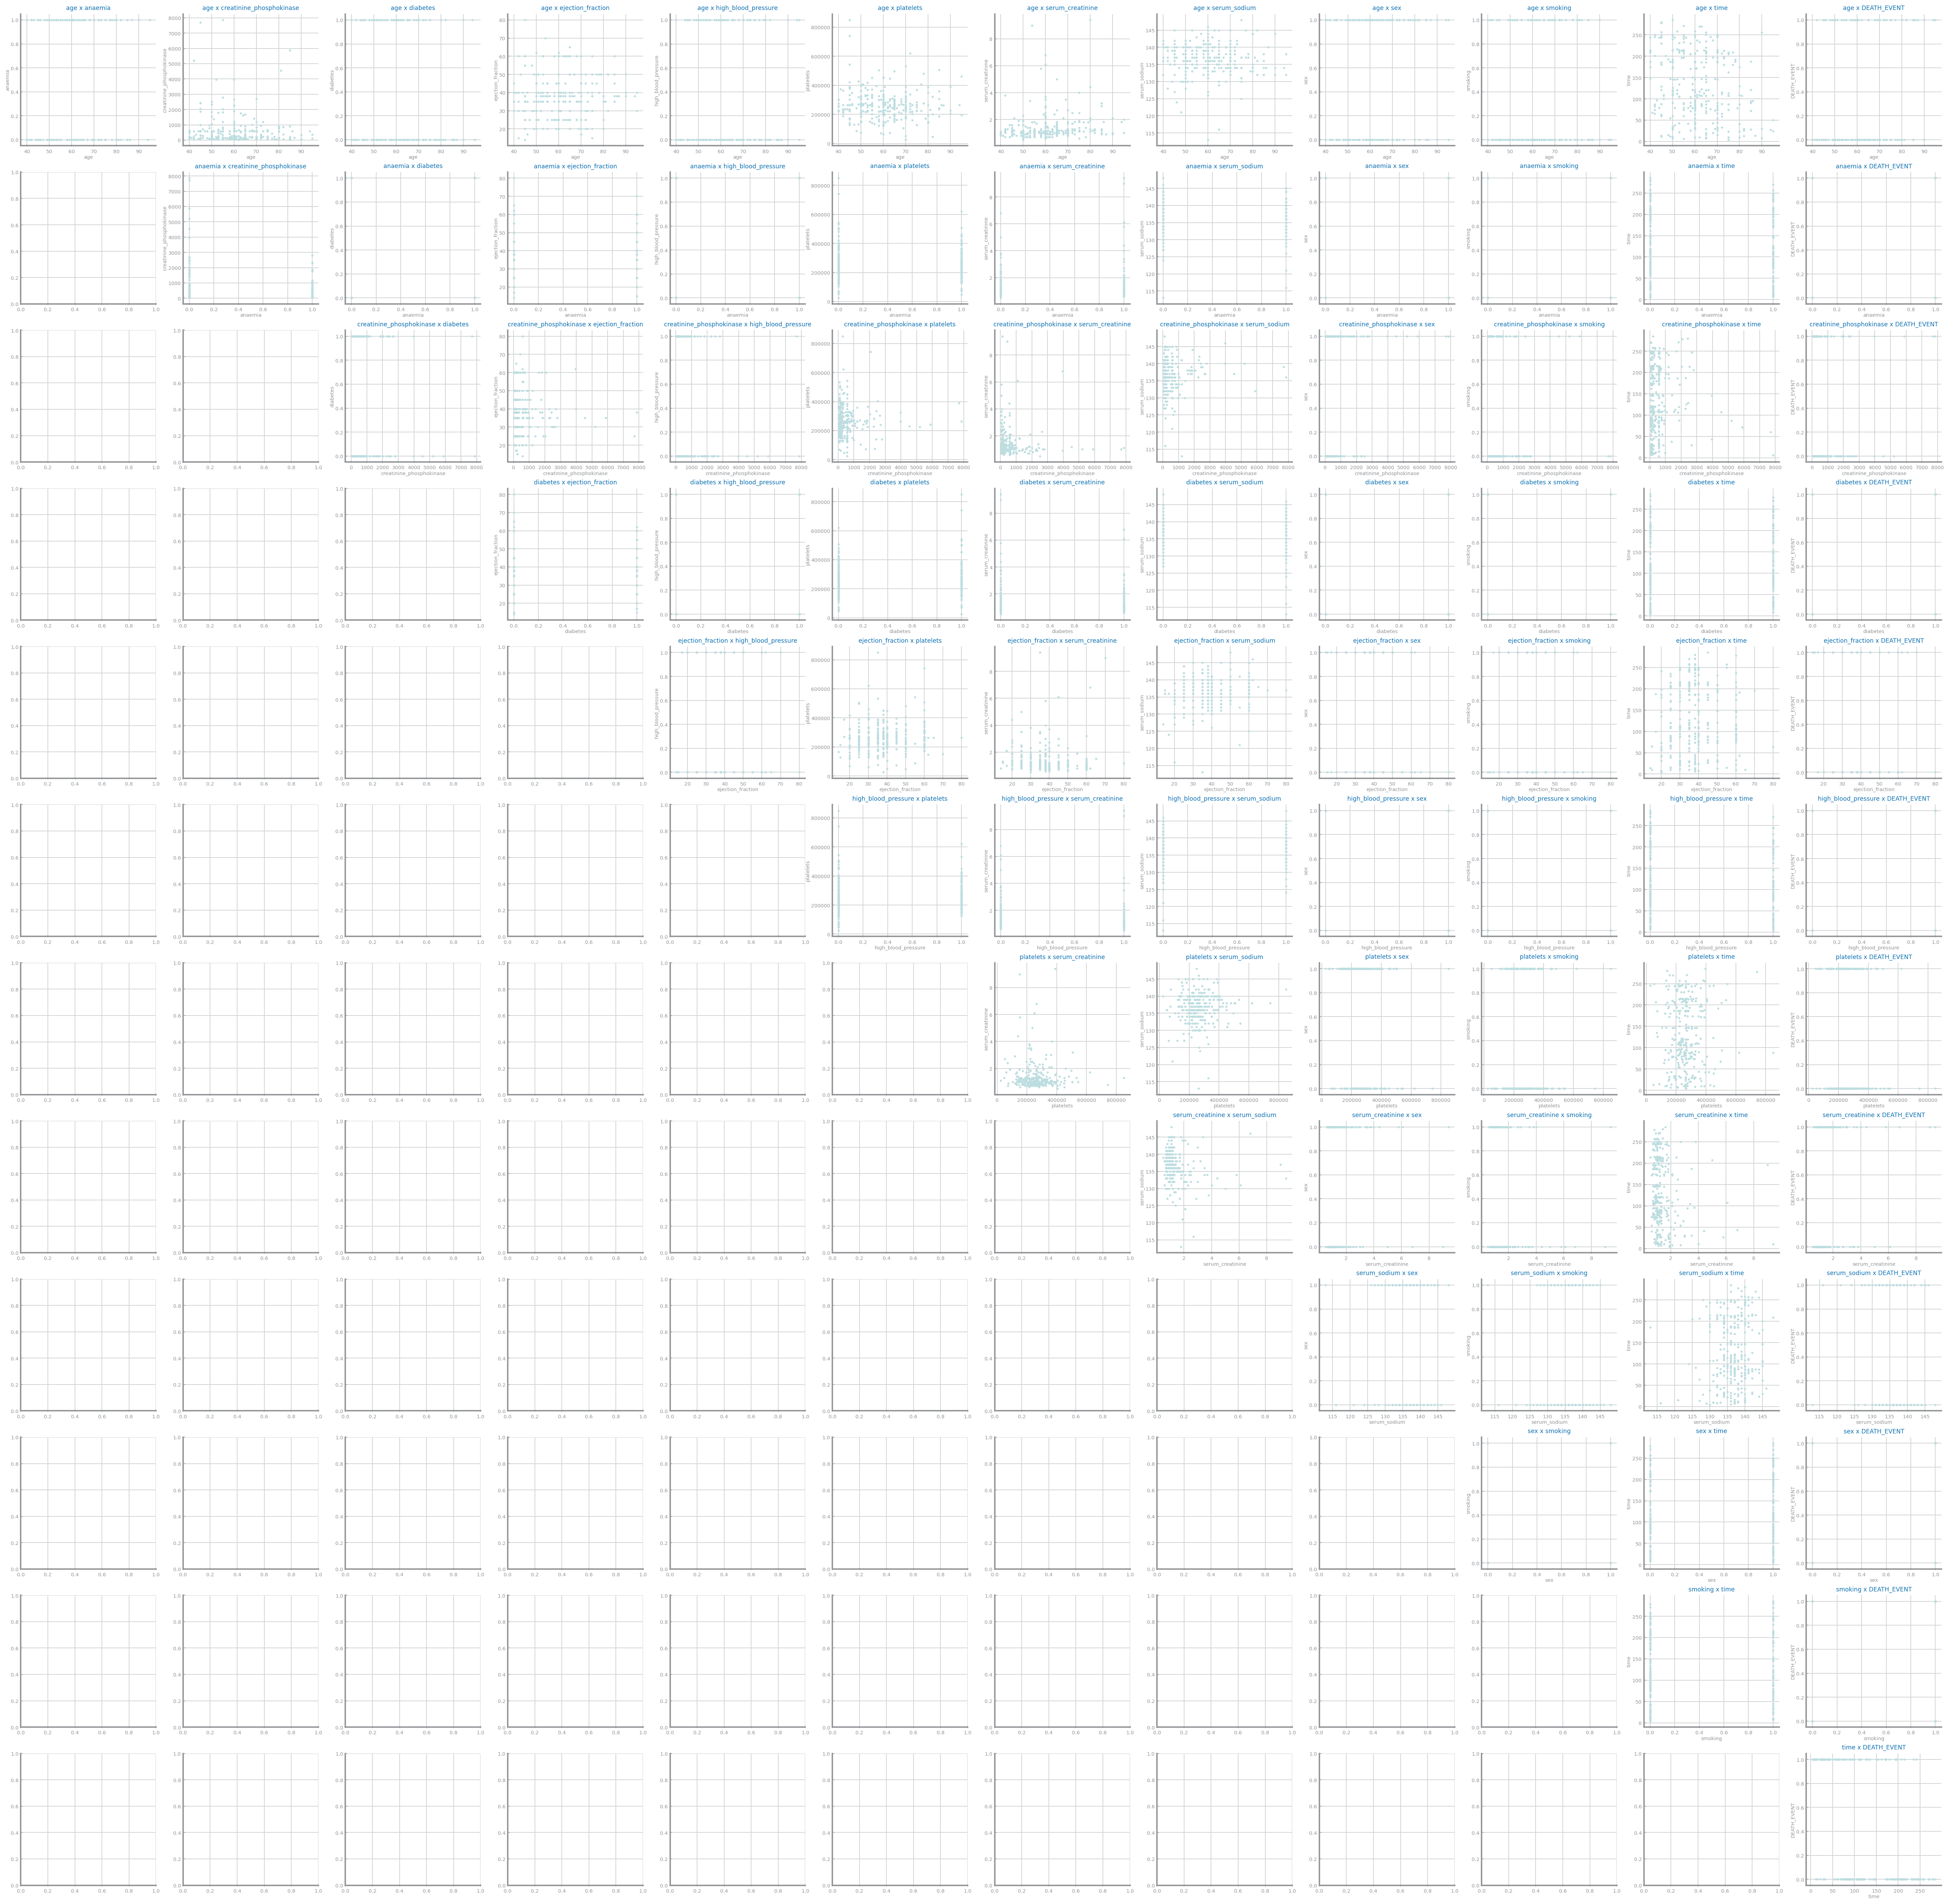

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import config as cfg

data = pd.read_csv('heart_failure_clinical_records_dataset.csv', sep = ',')

columns = data.select_dtypes(include='number').columns
rows, cols = len(columns)-1, len(columns)-1
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
for i in range(len(columns)):
    var1 = columns[i]
    for j in range(i+1, len(columns)):
        var2 = columns[j]
        axs[i, j-1].set_title("%s x %s"%(var1,var2))
        axs[i, j-1].set_xlabel(var1)
        axs[i, j-1].set_ylabel(var2)
        axs[i, j-1].scatter(data[var1], data[var2])
plt.show()

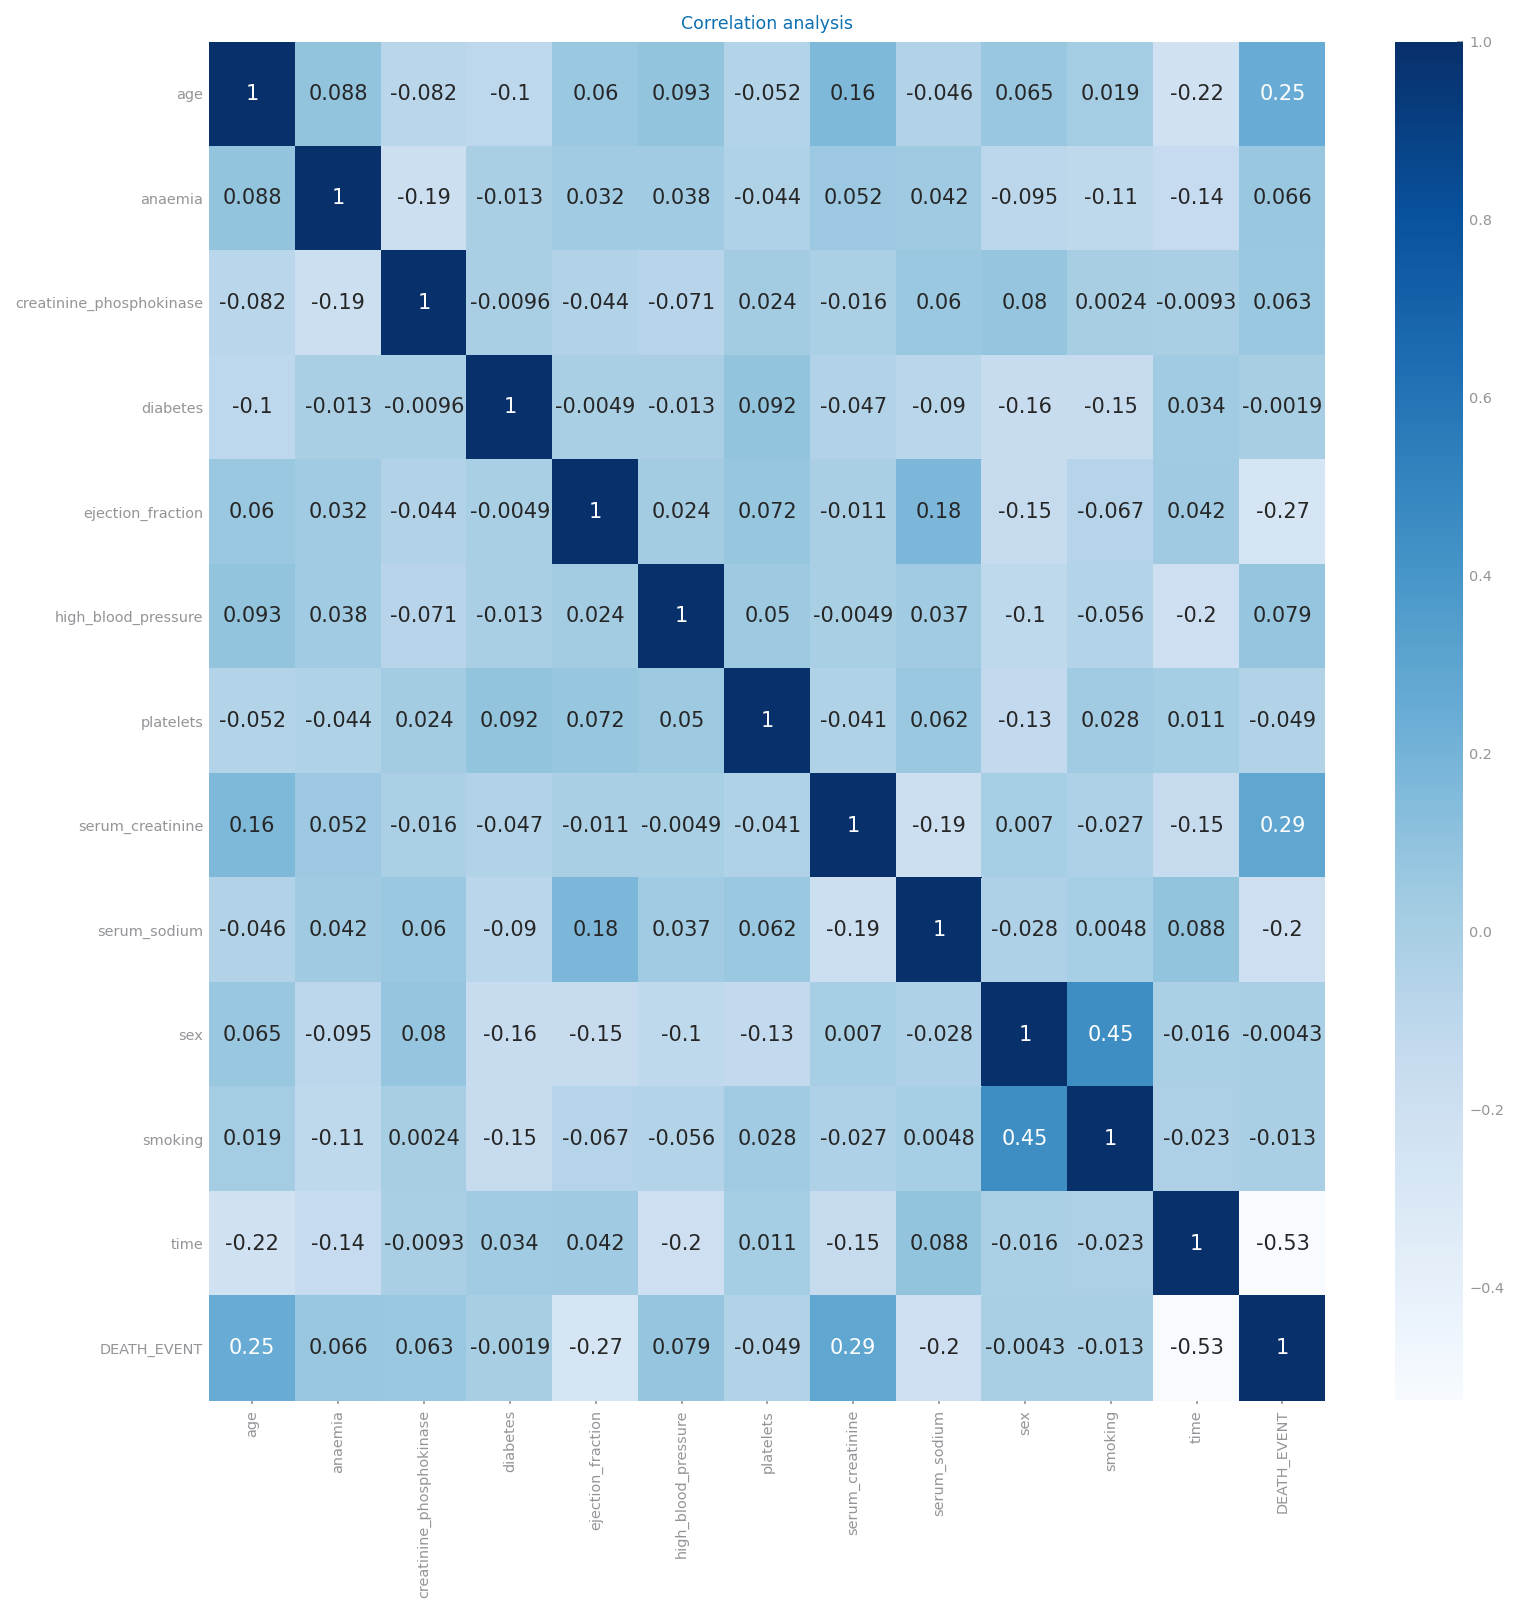

In [20]:
import seaborn as sns

fig = plt.figure(figsize=[12, 12])
corr_mtx = data.corr()
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
plt.title('Correlation analysis')
plt.show()